# **ANÁLISE DE REDES**
## Atividade 01 - Prática com PyVis e Streamlit
# **Autores**
### José Alex
### Fabricio Cruz

## **Instalando pyvis**

In [ ]:
!pip install pyvis

## **Importando bibliotecas e dataset**
### **Sobre o dataset:** O OpenFlights/Airline Route Mapper Route Database mapeou 59.036 rotas entre 3.209 aeroportos em 531 companhias aéreas em todo o mundo em janeiro de 2012. Segue aqui o link do dataset disponível no Kaggle: <https://www.kaggle.com/datasets/open-flights/flight-route-database>
### O nosso dataset não é fortemente conectado. Logo, não conseguimos encontrar valores de diâmetro e periferia. Para explorar essas funções vamos usar o dataset **NetworkOfThrones** que é um grafo não direcionado conectado.

In [83]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
from IPython.core.display import display, HTML
import scipy as sp
import matplotlib.pyplot as plt
import collections

got_data = pd.read_csv("https://raw.githubusercontent.com/pupimvictor/NetworkOfThrones/master/stormofswords.csv")
routes_data = pd.read_csv("routes.csv")

G = nx.from_pandas_edgelist(got_data, source = "Source", target = "Target")
R = nx.from_pandas_edgelist(routes_data, source = "Source", target = "Target", create_using=nx.DiGraph())

## **Exibindo matriz de adjacencia**
Devido ao dataset ser muito grande a matriz fica resumida

In [ ]:
print(nx.adjacency_matrix(R).todense())

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


## **Diametro da rede**

In [ ]:
print('diameter: ', nx.diameter(G))
print('periphery: ', nx.periphery(G))

diameter:  6
periphery:  ['Amory', 'Illyrio', 'Jojen', 'Luwin', 'Nan', 'Karl', 'Cressen', 'Salladhor', 'Bowen', 'Lancel', 'Shireen']


## **Histograma de distribuição empírica de grau**

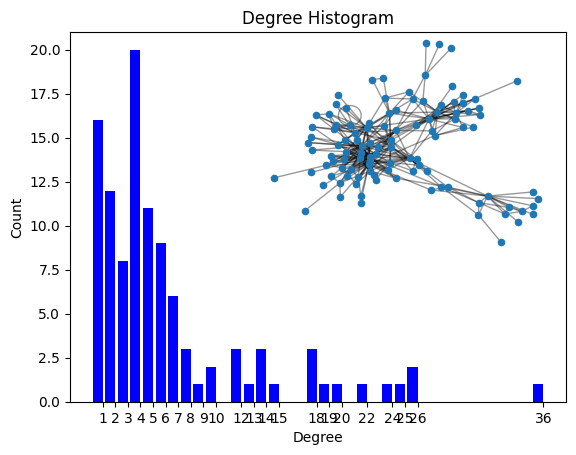

In [86]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

## **Coeﬁciente de clustering local para nós escolhidos.**

In [ ]:
print('Clusterização')
print('Aeroporto Santos Dumont (SDU): ', nx.clustering(R, 'SDU'))
print('Aeroporto de Guarulhos (GRU): ', nx.clustering(R, 'GRU'))
print('Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.\n')

Clusterização
Aeroporto Santos Dumont (SDU):  0.39869281045751637
Aeroporto de Guarulhos (GRU):  0.17031927232769672
Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.



## **Coeﬁciente de clustering global**

In [ ]:
print('Clusterização global: ', nx.average_clustering(R))

Clusterização global:  0.4692087972063501
